***THE PROBLEM STATEMENT***

---

The main objective of developing a predictive model for classifying the race of individuals involved in criminal activities using LAPD crime data which can fulfill the following:  


1.   Crime Prevention Strategy
2.   Monitoring and Evalution
3.   Better Public Policies



---


For Evalution Metric, we'll take the following metrics:


1.   Precision and Recall :
2.   F1 Score
3.   Bias and Fairness Metrics  




**IMPORTING DEPENDENCIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pt
import seaborn as sns

**GETTING THE DATA**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/DATASETS.CSV/Crime_Data_from_2020_to_Present.csv')

In [ ]:
df=pd.read_csv('crime.csv')

In [ ]:
df.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Vict Descent
0,190326475,03-01-2020 00:00,03-01-2020 00:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,O
1,200106753,02-09-2020 00:00,02-08-2020 00:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,O
2,200320258,11-11-2020 00:00,11-04-2020 00:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,X
3,200907217,05-10-2023 00:00,03-10-2020 00:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,O
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,H
5,231808869,04-04-2023 00:00,12-01-2020 00:00,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,9900 COMPTON AV,NaN,33.9467,-118.2463,H
6,230110144,04-04-2023 00:00,07-03-2020 00:00,900,1,Central,182,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1100 S GRAND AV,NaN,34.0415,-118.2620,H
7,220314085,7/22/2022 0:00,05-12-2020 00:00,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,2500 S SYCAMORE AV,NaN,34.0335,-118.3537,B
8,231309864,4/28/2023 0:00,12-09-2020 00:00,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1300 E 57TH ST,NaN,33.9911,-118.2521,B
9,211904005,12/31/2020 0:00,12/31/2020 0:00,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535,H


**PREPROCESSING DATA WITH EDA**

---



#Dropping the below columns due to lack of a proper data card, several nulls and a lack of understanding of what the below columns stand for.

In [ ]:
df=df.drop('Crm Cd 1',axis=1)
df=df.drop('Crm Cd 2',axis=1)
df=df.drop('Crm Cd 3',axis=1)
df=df.drop('Crm Cd 4',axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30318 entries, 0 to 30317
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           30318 non-null  int64  
 1   Date Rptd       30318 non-null  object 
 2   DATE OCC        30318 non-null  object 
 3   TIME OCC        30318 non-null  int64  
 4   AREA            30318 non-null  int64  
 5   AREA NAME       30318 non-null  object 
 6   Rpt Dist No     30318 non-null  int64  
 7   Part 1-2        30318 non-null  int64  
 8   Crm Cd          30318 non-null  int64  
 9   Crm Cd Desc     30318 non-null  object 
 10  Mocodes         26347 non-null  object 
 11  Vict Age        30317 non-null  float64
 12  Vict Sex        26579 non-null  object 
 13  Premis Cd       30317 non-null  float64
 14  Premis Desc     30306 non-null  object 
 15  Weapon Used Cd  10872 non-null  float64
 16  Weapon Desc     10872 non-null  object 
 17  Status          30317 non-null 

In [ ]:
df = df.dropna(subset=['Status'])

In [ ]:
print(df.isna().sum())

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            3971
Vict Age              0
Vict Sex           3738
Premis Cd             0
Premis Desc          11
Weapon Used Cd    19445
Weapon Desc       19445
Status                0
Status Desc           0
LOCATION              0
Cross Street      25207
LAT                   0
LON                   0
Vict Descent       3740
dtype: int64


In [ ]:
df = df.rename(columns={'Part 1-2': 'Part1-2'})
df = df.rename(columns={'Rpt Dist No': 'RptDistNo'})

In [ ]:
print('DATA POINTS:',df.shape[0],'FEATURES:',df.shape[1])

DATA POINTS: 30317 FEATURES: 24


In [ ]:
df["Vict Descent"].unique()


array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'C', 'K', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L'], dtype=object)

In [ ]:
cat_columns = df.select_dtypes('object').columns

In [ ]:
cat_df=df[cat_columns]

In [ ]:
for col in cat_df:
  print("This col:",col ,len(cat_df[col].unique()))

This col: Date Rptd 1237
This col: DATE OCC 366
This col: AREA NAME 21
This col: Crm Cd Desc 119
This col: Mocodes 15159
This col: Vict Sex 5
This col: Premis Desc 237
This col: Weapon Desc 68
This col: Status 5
This col: Status Desc 5
This col: LOCATION 16489
This col: Cross Street 1920
This col: Vict Descent 20


In [ ]:
num_columns = df.select_dtypes('int64','float64').columns

In [ ]:
corr_mat = df[num_columns].corr()

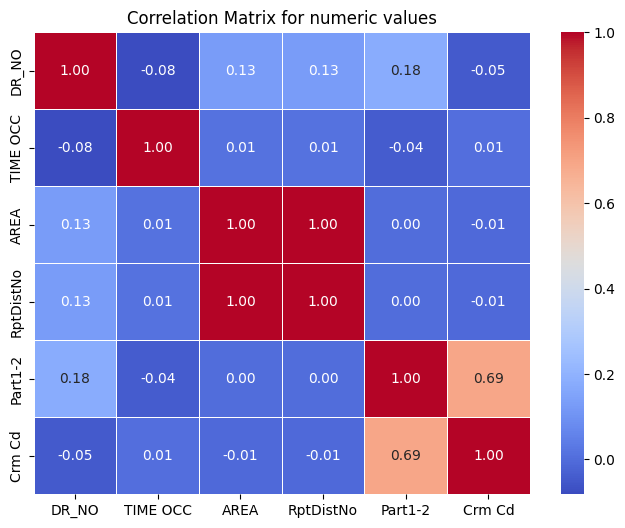

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for numeric values")
plt.show()

In [ ]:
num_columns

Index(['DR_NO', 'TIME OCC', 'AREA', 'RptDistNo', 'Part1-2', 'Crm Cd'], dtype='object')

#Dropping due to high correlation with other more useful variables as seen in the correlation matrix

In [ ]:
num_columns=df[num_columns].drop(['Part1-2'],axis=1)
num_columns=num_columns.drop(['RptDistNo'],axis=1)
print(num_columns.head())

       DR_NO  TIME OCC  AREA  Crm Cd
0  190326475      2130     7     510
1  200106753      1800     1     330
2  200320258      1700     3     480
3  200907217      2037     9     343
4  220614831      1200     6     354


In [ ]:
corr_mat2 = num_columns.corr()

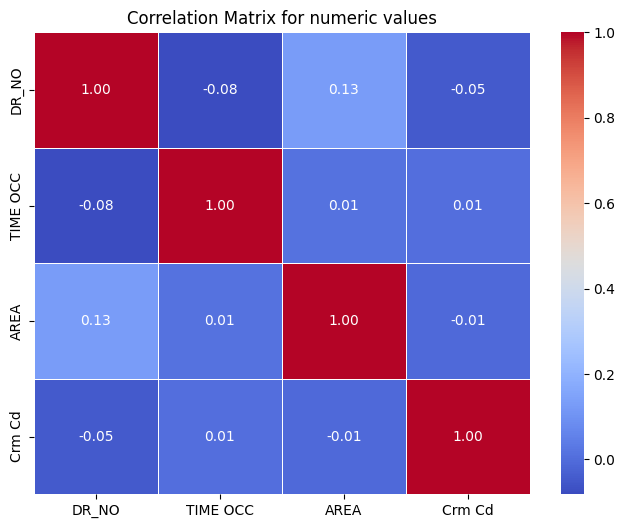

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for numeric values")
plt.show()

#Quite uncorrelated variables have been obtained for numeric values.

In [ ]:
num_columns['TIME OCC']

0        2130
1        1800
2        1700
3        2037
4        1200
         ... 
30312    1920
30313    1615
30314     200
30315     600
30316    1530
Name: TIME OCC, Length: 30317, dtype: int64

**TIME FORMAT IS IN 24 HOUR, WE MAY MAKE A CATEGORICAL COLUMN AS AN INTERPRETATION OF THE NUMERIC COLUMN FOR CONVENIENCE.**

---



In [ ]:
cat_time=[]
for item in num_columns['TIME OCC']:
  if item>=400 and item<1200:
    cat_time.append('Morning')
  if item>=1200 and item<1700:
    cat_time.append('Afternoon')
  if item>=1700 and item<2100:
    cat_time.append('Evening')
  if item>=2100 and item<=2359:
    cat_time.append('Night')
  if item>=0000 and item<400:
    cat_time.append('Midnight')

In [ ]:
time_df=pd.DataFrame(cat_time)
print(time_df.shape)
print(df[cat_columns].shape)

(30317, 1)
(30317, 13)


In [ ]:
# Concatenate along columns (axis=1)
cat_columns = pd.concat([df[cat_columns], time_df], axis=1)
print("\nConcatenated DataFrame along columns:")
cat_columns.head()



Concatenated DataFrame along columns:


,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,Vict Descent,0
0,03-01-2020 00:00,03-01-2020 00:00,Wilshire,VEHICLE - STOLEN,NaN,M,STREET,NaN,AA,Adult Arrest,1900 S LONGWOOD AV,NaN,O,Night
1,02-09-2020 00:00,02-08-2020 00:00,Central,BURGLARY FROM VEHICLE,1822 1402 0344,M,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,IC,Invest Cont,1000 S FLOWER ST,NaN,O,Evening
2,11-11-2020 00:00,11-04-2020 00:00,Southwest,BIKE - STOLEN,0344 1251,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,1400 W 37TH ST,NaN,X,Evening
3,05-10-2023 00:00,03-10-2020 00:00,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,M,CLOTHING STORE,NaN,IC,Invest Cont,14000 RIVERSIDE DR,NaN,O,Evening
4,8/18/2022 0:00,8/17/2020 0:00,Hollywood,THEFT OF IDENTITY,1822 1501 0930 2004,M,SIDEWALK,NaN,IC,Invest Cont,1900 TRANSIENT,NaN,H,Afternoon


**RENAMING COLUMNS AND DROPPING DATE OCC COLUMNS**

---



In [ ]:
cat_columns = cat_columns.drop(['DATE OCC'],axis = 1)


In [ ]:
cat_columns = cat_columns.rename(columns = {0:'TIME'})

In [ ]:
cat_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30317 entries, 0 to 30316
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date Rptd     30317 non-null  object
 1   AREA NAME     30317 non-null  object
 2   Crm Cd Desc   30317 non-null  object
 3   Mocodes       26346 non-null  object
 4   Vict Sex      26579 non-null  object
 5   Premis Desc   30306 non-null  object
 6   Weapon Desc   10872 non-null  object
 7   Status        30317 non-null  object
 8   Status Desc   30317 non-null  object
 9   LOCATION      30317 non-null  object
 10  Cross Street  5110 non-null   object
 11  Vict Descent  26577 non-null  object
 12  TIME          30317 non-null  object
dtypes: object(13)
memory usage: 4.2+ MB


**MAPPING THE REMAINING ASIAN ETHNICITIES AS ONE RACE**

---



<Axes: >

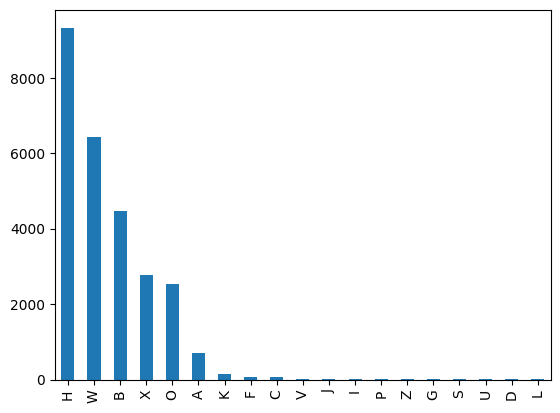

In [ ]:
df['Vict Descent'].value_counts().plot(kind = 'bar')

In [ ]:
df['Vict Descent'].unique()

array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'C', 'K', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L'], dtype=object)

In [ ]:
def mapper(val):
    if val in ['B', 'W', 'H', 'X']:
        return val
    else:
        return 'O'

In [ ]:
cat_columns['Vict Descent'] = cat_columns['Vict Descent'].map(mapper)

<Axes: >

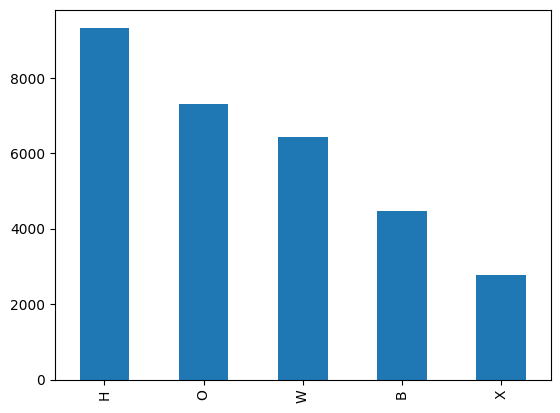

In [ ]:
cat_columns['Vict Descent'].value_counts().plot(kind = 'bar')

**IMPUTATION IN CATEGORICAL VALUES **

---



In [ ]:
print(cat_columns.isna().sum())

Date Rptd           0
AREA NAME           0
Crm Cd Desc         0
Mocodes          3971
Vict Sex         3738
Premis Desc        11
Weapon Desc     19445
Status              0
Status Desc         0
LOCATION            0
Cross Street    25207
Vict Descent        0
TIME                0
dtype: int64


In [ ]:
print(cat_columns.head())

          Date Rptd  AREA NAME                               Crm Cd Desc  \
0  03-01-2020 00:00   Wilshire                          VEHICLE - STOLEN   
1  02-09-2020 00:00    Central                     BURGLARY FROM VEHICLE   
2  11-11-2020 00:00  Southwest                             BIKE - STOLEN   
3  05-10-2023 00:00   Van Nuys  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)   
4    8/18/2022 0:00  Hollywood                         THEFT OF IDENTITY   

               Mocodes Vict Sex                                   Premis Desc  \
0                  NaN        M                                        STREET   
1       1822 1402 0344        M             BUS STOP/LAYOVER (ALSO QUERY 124)   
2            0344 1251        X  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
3            0325 1501        M                                CLOTHING STORE   
4  1822 1501 0930 2004        M                                      SIDEWALK   

  Weapon Desc Status   Status Desc                      

In [ ]:
cat_columns.shape

(30317, 13)

#Cat Col Vict Sex

In [ ]:
print(cat_columns['Vict Sex'])

0        M
1        M
2        X
3        M
4        M
        ..
30312    M
30313    F
30314    F
30315    F
30316    M
Name: Vict Sex, Length: 30317, dtype: object


In [ ]:
print(cat_columns['Vict Sex'].unique())
print(cat_columns['Vict Sex'].value_counts())

['M' 'X' 'F' nan 'H']
M    12779
F    11282
X     2516
H        2
Name: Vict Sex, dtype: int64


In [ ]:
mapping = {np.nan: '0', 'M': '1', 'F': '2', 'H':'3', 'X':'4'}
cat_columns['Vict Sex'] = cat_columns['Vict Sex'].map(mapping)

In [ ]:
print(cat_columns['Vict Sex'].unique())
print(cat_columns['Vict Sex'].value_counts())

['1' '4' '2' '0' '3']
1    12779
2    11282
0     3738
4     2516
3        2
Name: Vict Sex, dtype: int64


In [ ]:
print(cat_columns['Vict Sex'])

0        1
1        1
2        4
3        1
4        1
        ..
30312    1
30313    2
30314    2
30315    2
30316    1
Name: Vict Sex, Length: 30317, dtype: object


<Axes: >

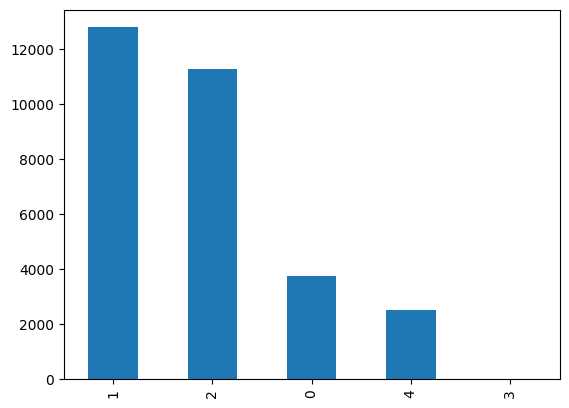

In [ ]:
cat_columns['Vict Sex'].value_counts().plot(kind = 'bar')

#Cat col Mocodes

#MoCode is five alphanumeric characters, used in PeopleSoft modules as a shorthand way to represent or populate ChartFields.

In [ ]:
print(cat_columns['Mocodes'])

0                                  NaN
1                       1822 1402 0344
2                            0344 1251
3                            0325 1501
4                  1822 1501 0930 2004
                     ...              
30312              0334 0443 0329 1822
30313                        0344 2019
30314         2000 0913 1814 0449 0344
30315    0329 0344 1605 0311 0321 0906
30316                   1822 2032 0344
Name: Mocodes, Length: 30317, dtype: object


In [ ]:
cat_columns['Mocodes'] = cat_columns['Mocodes'].fillna('0')

print(cat_columns['Mocodes'].unique())
print(cat_columns['Mocodes'].value_counts())

['0' '1822 1402 0344' '0344 1251' ... '0344 2019'
 '2000 0913 1814 0449 0344' '0329 0344 1605 0311 0321 0906']
0                                          3971
344                                        1270
329                                         789
1501                                        358
1822                                        211
                                           ... 
1601 0344 0321                                1
1300 1309 0913 0329 1817                      1
2004 0334 0913 0445 2002 0400 0432 1402       1
0329 0400 1822 1501                           1
0329 0344 1605 0311 0321 0906                 1
Name: Mocodes, Length: 15159, dtype: int64


#There isnt much point in vizualising this column as its not categorical but Codes.

#Premis Desc

In [ ]:
print(cat_columns['Premis Desc'])

0                                              STREET
1                   BUS STOP/LAYOVER (ALSO QUERY 124)
2        MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
3                                      CLOTHING STORE
4                                            SIDEWALK
                             ...                     
30312                                          STREET
30313                                        DRIVEWAY
30314                                          STREET
30315    MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
30316                                          STREET
Name: Premis Desc, Length: 30317, dtype: object


In [ ]:
cat_columns['Premis Desc'] = cat_columns['Premis Desc'].fillna('None')

print(cat_columns['Premis Desc'].unique())
print(cat_columns['Premis Desc'].value_counts())


['STREET' 'BUS STOP/LAYOVER (ALSO QUERY 124)'
 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' 'CLOTHING STORE'
 'SIDEWALK' 'SINGLE FAMILY DWELLING' 'CELL PHONE STORE' 'CYBERSPACE'
 'WEBSITE' 'OTHER BUSINESS' 'PARKING LOT' 'OTHER RESIDENCE'
 'AUTOMATED TELLER MACHINE (ATM)' 'DEPARTMENT STORE' 'PUBLIC STORAGE'
 'GARAGE/CARPORT' 'EQUIPMENT RENTAL' 'OFFICE BUILDING/OFFICE'
 'POLICE FACILITY' 'MTA BUS' 'SPECIALTY SCHOOL/OTHER'
 'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)' 'SKATING RINK*'
 'BUS STOP' 'JUNIOR HIGH SCHOOL' 'OTHER/OUTSIDE' 'ALLEY'
 'VEHICLE, PASSENGER/TRUCK' 'BANK' 'ABANDONED BUILDING ABANDONED HOUSE'
 'TRANSPORTATION FACILITY (AIRPORT)' 'MOTEL' 'HOSPITAL'
 'BUS, SCHOOL, CHURCH' 'OTHER PREMISE' 'STORAGE SHED' 'OTHER STORE'
 'HIGH SCHOOL' 'MAIL BOX' 'HOTEL' 'NIGHT CLUB (OPEN EVENINGS ONLY)'
 'FINANCE COMPANY' 'PARK/PLAYGROUND' 'HEALTH SPA/GYM'
 'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)' 'COLISEUM' 'DRIVEWAY'
 'UNDERPASS/BRIDGE*' 'BANKING INSIDE MARKET-STORE *'
 '

#Weapon Desc

In [ ]:
cat_columns['Weapon Desc'] = cat_columns['Weapon Desc'].fillna('None')

print(cat_columns['Weapon Desc'].unique())
print(cat_columns['Weapon Desc'].value_counts())


['None' 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' 'VEHICLE'
 'UNKNOWN WEAPON/OTHER WEAPON' 'VERBAL THREAT'
 'BELT FLAILING INSTRUMENT/CHAIN' 'HAND GUN' 'UNKNOWN FIREARM'
 'KNIFE WITH BLADE 6INCHES OR LESS' 'FIXED OBJECT' 'KITCHEN KNIFE'
 'MACHETE' 'UNKNOWN TYPE CUTTING INSTRUMENT' 'MACE/PEPPER SPRAY'
 'CLUB/BAT' 'STICK' 'OTHER KNIFE' 'PHYSICAL PRESENCE'
 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH' 'HAMMER'
 'AIR PISTOL/REVOLVER/RIFLE/BB GUN' 'SEMI-AUTOMATIC PISTOL'
 'SIMULATED GUN' 'RAZOR' 'OTHER FIREARM' 'FOLDING KNIFE' 'PIPE/METAL PIPE'
 'ROCK/THROWN OBJECT' 'RIFLE' 'OTHER CUTTING INSTRUMENT' 'FIRE' 'REVOLVER'
 'BOTTLE' 'SCISSORS' 'SWITCH BLADE' 'BRASS KNUCKLES' 'BLUNT INSTRUMENT'
 'BOARD' 'STUN GUN' 'CLEAVER' 'RAZOR BLADE' 'SCREWDRIVER' 'SHOTGUN'
 'CONCRETE BLOCK/BRICK' 'CAUSTIC CHEMICAL/POISON' 'SEMI-AUTOMATIC RIFLE'
 'SCALDING LIQUID' 'TIRE IRON' 'BOWIE KNIFE' 'GLASS' 'AXE' 'TOY GUN'
 'BOMB THREAT' 'SAWED OFF RIFLE/SHOTGUN' 'MARTIAL ARTS WEAPONS'
 'DEMAND NOTE' 'DIRK/DAGGER'

#Check this out
#Check this out
#check this out
#@Ved

<Axes: >

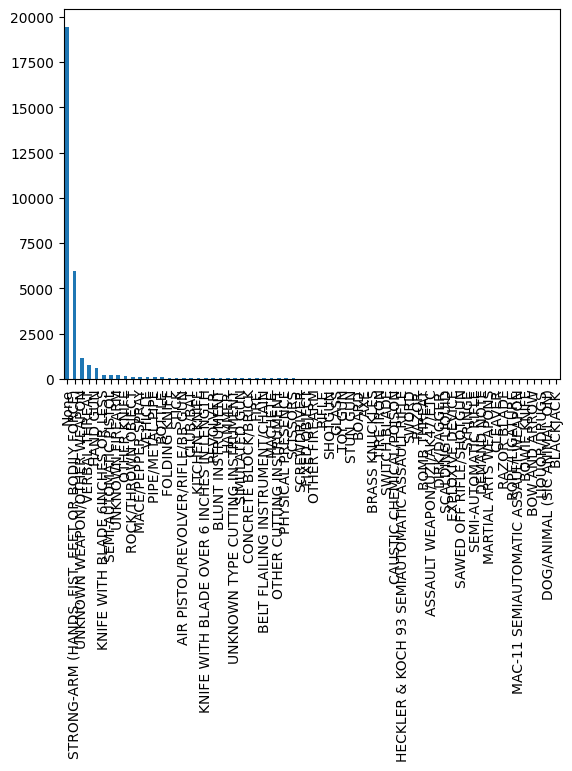

In [ ]:
cat_columns['Weapon Desc'].value_counts().plot(kind = 'bar')

In [ ]:
def mapper(val):
    if val in ['None', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT','HAND GUN']:
        return val
    else:
        return 'O'

In [ ]:
cat_columns['Weapon Desc'] = cat_columns['Weapon Desc'].map(mapper)

<Axes: >

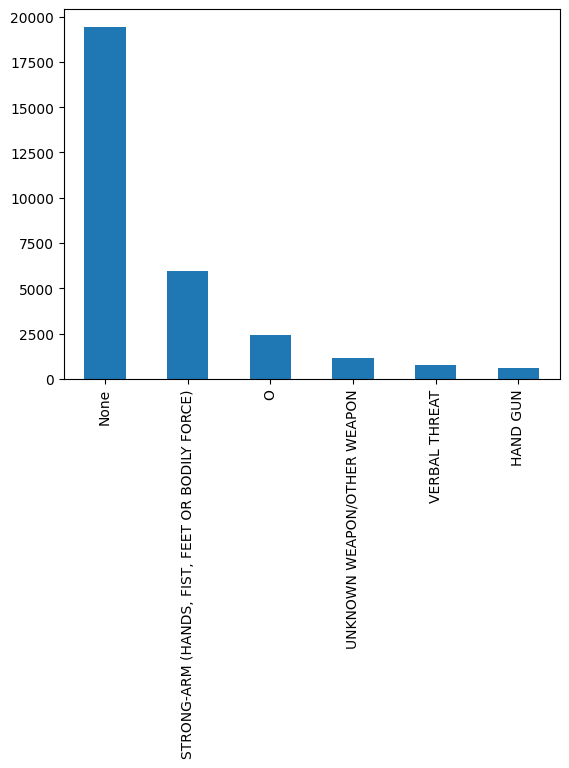

In [ ]:
cat_columns['Weapon Desc'].value_counts().plot(kind = 'bar')

In [ ]:
print(cat_columns.isna().sum())

Date Rptd           0
AREA NAME           0
Crm Cd Desc         0
Mocodes             0
Vict Sex            0
Premis Desc         0
Weapon Desc         0
Status              0
Status Desc         0
LOCATION            0
Cross Street    25207
Vict Descent        0
TIME                0
dtype: int64


#Cross Street

In [ ]:
print(cat_columns['Cross Street'])

0                                    NaN
1                                    NaN
2                                    NaN
3                                    NaN
4                                    NaN
                      ...               
30312                             HOOPER
30313                                NaN
30314    WHITTIER                     BL
30315                                NaN
30316    MAIN                         ST
Name: Cross Street, Length: 30317, dtype: object


In [ ]:
cat_columns['Cross Street'] = cat_columns['Cross Street'].fillna('None')

print(cat_columns['Cross Street'].unique())
print(cat_columns['Cross Street'].value_counts())


['None' 'VANOWEN                      AV' 'INGLEWOOD' ...
 'FIGUEROA                     AV' 'BONSALLO                     AV'
 'WISH']
None                               25207
BROADWAY                              80
FIGUEROA                              68
FIGUEROA                     ST       57
VERMONT                      AV       54
                                   ...  
VOSE                                   1
CARLOS                                 1
HIGHLAND VIEW                AV        1
MIDWOOD                                1
WISH                                   1
Name: Cross Street, Length: 1920, dtype: int64


In [ ]:
print(cat_columns.isna().sum())

Date Rptd       0
AREA NAME       0
Crm Cd Desc     0
Mocodes         0
Vict Sex        0
Premis Desc     0
Weapon Desc     0
Status          0
Status Desc     0
LOCATION        0
Cross Street    0
Vict Descent    0
TIME            0
dtype: int64


In [ ]:
cat_columns.head()

,Date Rptd,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,Vict Descent,TIME
0,03-01-2020 00:00,Wilshire,VEHICLE - STOLEN,0,1,STREET,None,AA,Adult Arrest,1900 S LONGWOOD AV,None,O,Night
1,02-09-2020 00:00,Central,BURGLARY FROM VEHICLE,1822 1402 0344,1,BUS STOP/LAYOVER (ALSO QUERY 124),None,IC,Invest Cont,1000 S FLOWER ST,None,O,Evening
2,11-11-2020 00:00,Southwest,BIKE - STOLEN,0344 1251,4,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,IC,Invest Cont,1400 W 37TH ST,None,X,Evening
3,05-10-2023 00:00,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,1,CLOTHING STORE,None,IC,Invest Cont,14000 RIVERSIDE DR,None,O,Evening
4,8/18/2022 0:00,Hollywood,THEFT OF IDENTITY,1822 1501 0930 2004,1,SIDEWALK,None,IC,Invest Cont,1900 TRANSIENT,None,H,Afternoon


In [ ]:
print(cat_columns['Crm Cd Desc'].unique())
print(cat_columns['Crm Cd Desc'].value_counts())

['VEHICLE - STOLEN' 'BURGLARY FROM VEHICLE' 'BIKE - STOLEN'
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)' 'THEFT OF IDENTITY'
 'BATTERY - SIMPLE ASSAULT'
 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH'
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'
 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'RAPE, FORCIBLE' 'CRIMINAL THREATS - NO WEAPON DISPLAYED'
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)'
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'
 'CHILD ANNOYING (17YRS & UNDER)' 'BURGLARY' 'CONTEMPT OF COURT'
 'THEFT PLAIN - PETTY ($950 & UNDER)' 'INTIMATE PARTNER - SIMPLE ASSAULT'
 'LEWD CONDUCT' 'THEFT PLAIN - ATTEMPT'
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)'
 'OTHER MISCELLANEOUS CRIME' 'ROBBERY' 'BUNCO, GRAND THEFT'
 'SEXUAL PENETRATION W/FOREIGN OBJECT' 'BATTERY WITH SEXUAL CONTAC

<Axes: >

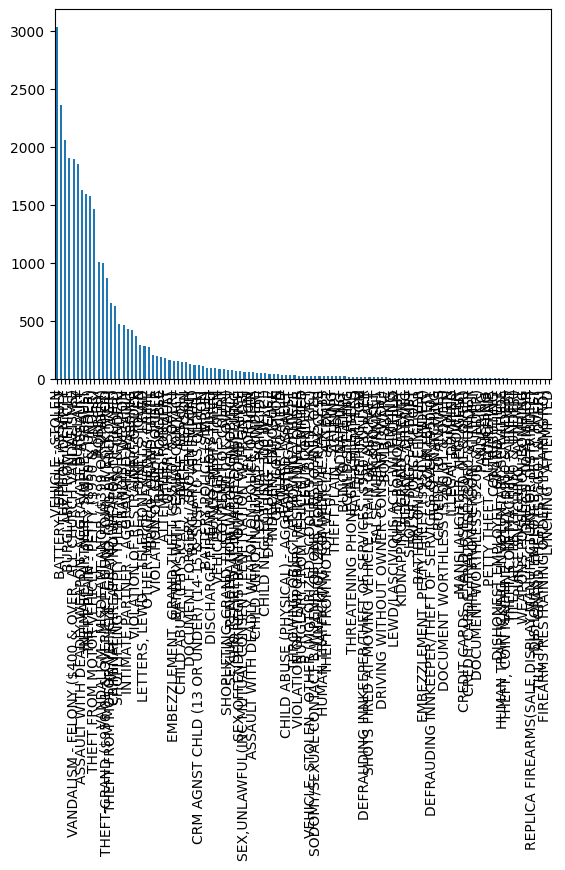

In [ ]:
cat_columns['Crm Cd Desc'].value_counts().plot(kind = 'bar')